In [143]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
#load Dataste
df=pd.read_csv('FuelConsumption(linear and multilinea).csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [145]:
#Data Exploration
row,column=df.shape

In [146]:
print('row:',row)
print('column:',column)

row: 1067
column: 13


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [148]:
#Data sta
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Data visualition

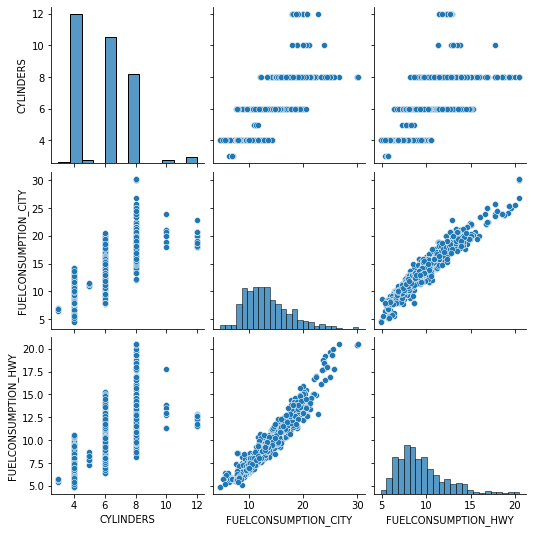

In [149]:
sns.pairplot(df.iloc[:,5:10],)

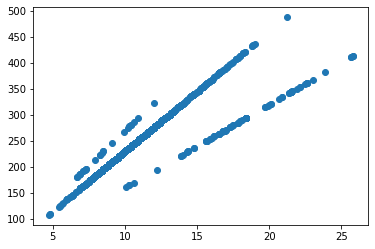

In [150]:
plt.scatter(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'])

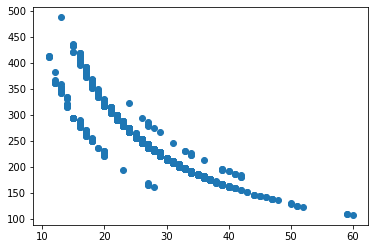

In [151]:
plt.scatter(df['FUELCONSUMPTION_COMB_MPG'],df['CO2EMISSIONS'])

C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CYLINDERS', ylabel='count'>

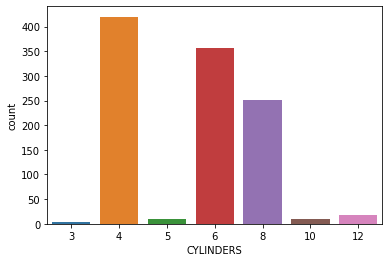

In [152]:
sns.countplot(df['CYLINDERS'])

C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

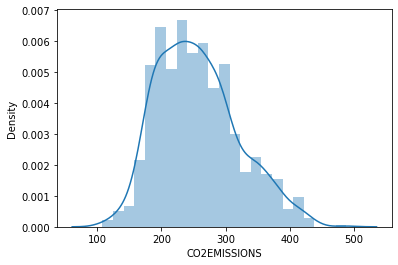

In [153]:
sns.distplot(df['CO2EMISSIONS'])

Text(0, 0.5, 'CO2EMISSIONS')

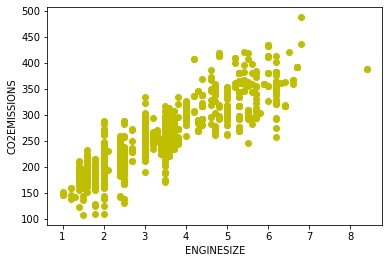

In [154]:
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'],color='y')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')


<Figure size 1080x720 with 0 Axes>

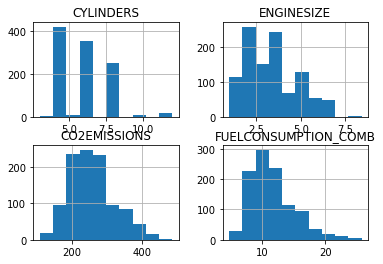

In [155]:
plt.figure(figsize=(15,10))
x=df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
x.hist()
plt.show()

# Data preprocessig

In [156]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [157]:
#label encoader
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['MODEL']=le.fit_transform(df['MODEL'])


In [158]:
df['MODEL']=le.fit_transform(df['MODEL'])
df['VEHICLECLASS']=le.fit_transform(df['VEHICLECLASS'])
df['FUELTYPE']=le.fit_transform(df['FUELTYPE'])

In [159]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,329,0,2.0,4,AS5,3,9.9,6.7,8.5,33,196
1,2014,ACURA,329,0,2.4,4,M6,3,11.2,7.7,9.6,29,221
2,2014,ACURA,330,0,1.5,4,AV7,3,6.0,5.8,5.9,48,136
3,2014,ACURA,389,11,3.5,6,AS6,3,12.7,9.1,11.1,25,255
4,2014,ACURA,483,11,3.5,6,AS6,3,12.1,8.7,10.6,27,244


In [160]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [161]:
df=df.drop(['MODELYEAR','MAKE','TRANSMISSION','VEHICLECLASS'],axis=1)
df.head()

,MODEL,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,329,2.0,4,3,9.9,6.7,8.5,33,196
1,329,2.4,4,3,11.2,7.7,9.6,29,221
2,330,1.5,4,3,6.0,5.8,5.9,48,136
3,389,3.5,6,3,12.7,9.1,11.1,25,255
4,483,3.5,6,3,12.1,8.7,10.6,27,244


In [162]:
df.shape

(1067, 9)

In [163]:
df.corr()

,MODEL,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODEL,1.000000,0.096304,0.080010,-0.051902,0.147394,0.182009,0.161373,-0.148806,0.155492
ENGINESIZE,0.096304,1.000000,0.934011,0.060869,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.080010,0.934011,1.000000,0.127959,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELTYPE,-0.051902,0.060869,0.127959,1.000000,-0.128841,-0.178439,-0.148167,0.007106,0.075167
FUELCONSUMPTION_CITY,0.147394,0.832225,0.796473,-0.128841,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.182009,0.778746,0.724594,-0.178439,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.161373,0.819482,0.776788,-0.148167,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.148806,-0.808554,-0.770430,0.007106,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.155492,0.874154,0.849685,0.075167,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

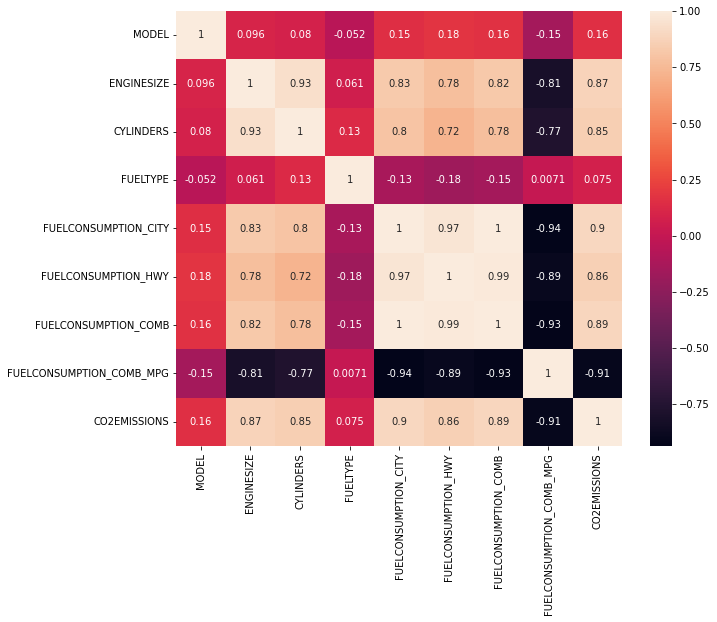

In [164]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Data splitting

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop('CO2EMISSIONS',axis=1),df.CO2EMISSIONS,test_size=0.2)


In [166]:
print('The shape of X_train dataset:',X_train.shape,'and The shape of y_train dataset:',y_train.shape)
print('The shape of X_train dataset:',X_test.shape,'and The shape of y_train dataset:',y_test.shape)

The shape of X_train dataset: (746, 8) and The shape of y_train dataset: (746,)
The shape of X_train dataset: (321, 8) and The shape of y_train dataset: (321,)


In [196]:
#model Buildding
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [168]:
#prediction
pred=model.predict(X_test)
pred

array([275.97497869, 294.0099331 , 194.70099371, 325.28401805,
       209.95502751, 348.50042183, 231.98238736, 300.43800552,
       203.79947955, 180.06716752, 212.98031935, 191.62183794,
       188.44902075, 207.47210651, 223.73549004, 241.36448725,
       250.29895848, 283.51252006, 203.15148002, 208.57261623,
       260.66624434, 184.23847199, 300.3435233 , 242.7260935 ,
       259.78027807, 233.53148832, 234.59151719, 256.7716401 ,
       272.12105259, 301.31439317, 244.70459759, 200.18955722,
       213.01067323, 248.61188867, 206.00859319, 280.5959354 ,
       216.10107704, 337.08987602, 320.06996538, 358.59443804,
       175.19466535, 223.93086119, 321.6933431 , 192.95324922,
       239.63961847, 182.5508848 , 347.69951101, 173.70967982,
       374.79013387, 342.93893129, 259.21036855, 293.41365177,
       212.45897868, 296.16525059, 156.7749643 , 234.22140762,
       278.45743764, 391.97860225, 275.70172799, 342.9029353 ,
       178.6747647 , 310.89086332, 264.5998282 , 182.32

In [197]:
y_test

737    301
981    320
848    251
998    301
226    419
      ... 
214    344
960    269
210    347
145    250
277    242
Name: CO2EMISSIONS, Length: 214, dtype: int64

In [199]:
print('score:',model.score(X_test,y_test))

score: 0.8878778192124809


In [186]:
from sklearn.metrics import classification_report
#print(classification_report(y_test,pred))

In [194]:
from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,pred)